In [1]:
!pip3 install opencv-python

You should consider upgrading via the 'C:\Users\sangm\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#### 모델 로드 하기 ###
import cv2, torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import models
import numpy as np

C:\Users\sangm\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\sangm\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])

In [4]:
class suffle(nn.Module) :
    def __init__(self, output) :
        super().__init__()
        self.model = models.shufflenet_v2_x0_5(pretrained=True)
        self.model.fc = torch.nn.Linear(1024, output) #change the last FC layer
        
    def forward(self, x) :
        output = self.model(x)
        return output

In [5]:
# 전체 모델 가져옴
model = torch.load('./ShuffleNet_total_model2.pt', map_location=torch.device('cpu')) 
model.eval() # 평가 모드?

suffle(
  (model): ShuffleNetV2(
    (conv1): Sequential(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (stage2): Sequential(
      (0): InvertedResidual(
        (branch1): Sequential(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
          (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
        )
        (branch2): Sequential(
          (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(5

In [6]:
# 가중치만 가져옴
#model = suffle(6) # 6개의 class
#model.load_state_dict(torch.load('C:\data\ShuffleNet_model.pt', map_location=torch.device('cpu'))) # 저장해논 path에서 가중치 불러옴
#model.eval() # 평가 모드?

In [7]:
print(model.state_dict()) # 가중치 확인

OrderedDict([('model.conv1.0.weight', tensor([[[[ 6.4949e-01,  1.6977e-01, -2.3310e-01],
          [-2.6822e-03, -1.4498e+00, -5.9779e-02],
          [-3.2426e-01,  1.7473e-01,  8.3664e-01]],

         [[ 1.3414e+00,  1.8501e-01, -4.8412e-01],
          [-1.0511e-01, -2.1810e+00, -2.5847e-01],
          [-4.9846e-01,  8.4643e-02,  1.4172e+00]],

         [[ 3.4519e-01,  1.9670e-01, -1.7017e-01],
          [ 1.0528e-01, -8.4020e-01,  9.8442e-04],
          [-2.1543e-01,  1.0166e-01,  3.2869e-01]]],


        [[[ 6.5475e-01,  9.2568e-01,  7.1643e-01],
          [ 1.1559e-01,  1.5226e-01,  1.0156e-01],
          [-8.1797e-01, -1.1636e+00, -8.9758e-01]],

         [[ 1.1097e+00,  1.5147e+00,  1.1780e+00],
          [ 1.3533e-01,  1.2703e-01,  7.1092e-02],
          [-1.2346e+00, -1.7245e+00, -1.3118e+00]],

         [[ 2.0784e-01,  4.4687e-01,  2.2821e-01],
          [ 6.1868e-02,  1.2575e-01,  6.0108e-02],
          [-3.0958e-01, -5.9817e-01, -3.5480e-01]]],


        [[[ 1.3439e-01,  7.7

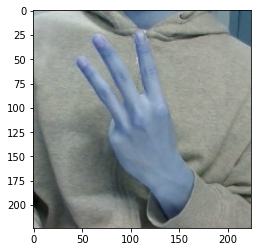

In [8]:
### 모델 테스트 ###
import PIL.Image as pilimg
import matplotlib.pyplot as plt
path = './\input\myfinger\8-3R.jpg' # 사진 경로
image = cv2.imread(path) # 기존 fingers 사진일 경우 cv2.imread(path)를 하면 색갈이 제대로 나옴
plt.imshow(image)

In [9]:
image = transform(image)
image

tensor([[[0.6431, 0.6400, 0.6419,  ..., 0.2275, 0.2275, 0.2275],
         [0.6495, 0.6463, 0.6439,  ..., 0.2275, 0.2269, 0.2243],
         [0.6483, 0.6473, 0.6481,  ..., 0.2275, 0.2267, 0.2235],
         ...,
         [0.6887, 0.7027, 0.6887,  ..., 0.5685, 0.5718, 0.5782],
         [0.6963, 0.7017, 0.6905,  ..., 0.5522, 0.5532, 0.5596],
         [0.7059, 0.6931, 0.6821,  ..., 0.5321, 0.5309, 0.5373]],

        [[0.7176, 0.7145, 0.7110,  ..., 0.3804, 0.3804, 0.3804],
         [0.7176, 0.7145, 0.7110,  ..., 0.3804, 0.3798, 0.3772],
         [0.7096, 0.7086, 0.7093,  ..., 0.3804, 0.3797, 0.3765],
         ...,
         [0.6980, 0.7120, 0.6997,  ..., 0.5567, 0.5600, 0.5664],
         [0.7002, 0.7056, 0.6998,  ..., 0.5405, 0.5414, 0.5478],
         [0.7098, 0.6971, 0.6914,  ..., 0.5203, 0.5191, 0.5255]],

        [[0.7294, 0.7262, 0.7228,  ..., 0.4667, 0.4667, 0.4667],
         [0.7294, 0.7262, 0.7228,  ..., 0.4667, 0.4661, 0.4635],
         [0.7186, 0.7176, 0.7184,  ..., 0.4667, 0.4659, 0.

In [10]:
image.shape

torch.Size([3, 256, 256])

In [11]:
image = image.unsqueeze(0) # 0번째에 차원을 하나 늘려줌
image.shape

torch.Size([1, 3, 256, 256])

In [12]:
pred = nn.functional.softmax(model(image), dim=1)
pred

tensor([[1.3175e-04, 5.5743e-05, 3.5246e-04, 9.9756e-01, 1.8082e-03, 8.9478e-05]],
       grad_fn=<SoftmaxBackward0>)

In [13]:
pred = pred.detach().numpy()
top_1 = np.argmax(pred, axis=1)
score = np.amax(pred, axis=1)
print(top_1, score)

[3] [0.9975625]


In [14]:
##### webcam test ##### 
import cv2 
cap = cv2.VideoCapture(0) 
cap.set(3, 720) 
cap.set(4, 1080) 


while True: 
    ret, frame = cap.read()
    frame = cv2.flip(frame,1) # 좌우반전
    cv2.imshow('test', frame) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # 해당 창을 클릭 후 q 누르면 종료(안되면 영문 바꿔서? 그래도 안되면 컨트롤알트딜리트..)
        break
        
cap.release() 
cv2.destroyAllWindows()

In [15]:
### webcam을 이용한 실시간 예측 ###(실패)
import PIL 
import cv2
import torchvision 
from torch.autograd import Variable

In [16]:
def preprocess(image): # 예측전 이미지 전처리
    image = PIL.Image.fromarray(image) #Webcam frames are numpy array format
                                       #Therefore transform back to PIL image
    #print(image)                             
    image = transform(image)
    image = image.float()
    #image = Variable(image, requires_autograd=True)
    #image = image.cpu() # 원래 코드 : image = image.cuda() (gpu가 없기 떄문에)
    image = image.unsqueeze(0) # 3d -> 4d
    return image                            #dimension out of our 3-D vector Tensor

In [18]:
cap = cv2.VideoCapture(0) #Set the webcam
cap.set(3,900)
cap.set(4,600)

fps = 0
show_score = 0
show_res = 'Nothing'
sequence = 0

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

while True:
    ret, frame = cap.read() #Capture each frame
    frame = cv2.flip(frame,1)
    
    if fps == 4:
        image   = frame[150:400, 300:600] # [높이범위, 폭범위] -> 밑에 rectangular 범위와 맞춰줘야함
        image   = preprocess(image)
        prediction   = model(image)
        fps = 0
        
        pred = nn.functional.softmax(prediction, dim=1)
        
    fps += 1
    cv2.putText(frame, '0 = %.3f' %(pred[0][0]),(700,250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, '1 = %.3f' %(pred[0][1]),(700,230), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, '2 = %.3f' %(pred[0][2]),(700,210), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, '3 = %.3f' %(pred[0][3]),(700,190), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, '4 = %.3f' %(pred[0][4]),(700,170), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.putText(frame, '5 = %.3f' %(pred[0][5]),(700,150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    cv2.rectangle(frame,(300,150),(600,400), (0,0,250), 2) # 박스 치는 코드 (완쪽 아래 꼭짓점, 오른쪽 위 꼭짓점, (B,G,R), 두께)
    cv2.imshow("finger detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()